<a href="https://colab.research.google.com/github/SolisProcopioUriel/SimulacionII/blob/main/Crecimiento_de_tumores_Presentaci%C3%B3n_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nombre: Uriel Solis Procopio

#Datos sobre el tipo de tumor que tenemos

*   Diagnostico incial: Carcinoma ductal invasivo
*   Sitio de muestra: Pecho
*   Malignidad primaria

#Datos del pasiente

* Sexo: Mujer
* Edad: 51 años

#Grupos de tratamiento:



*   5% Destrose in water (5 ml/kg)
*   Cisplatin (2 ml/kg)
*   Cyclophosphamide (40 mg/kg)
*   Docetaxcel (10 mg/kg)
*   Doxorubicin (2 mg/kg)

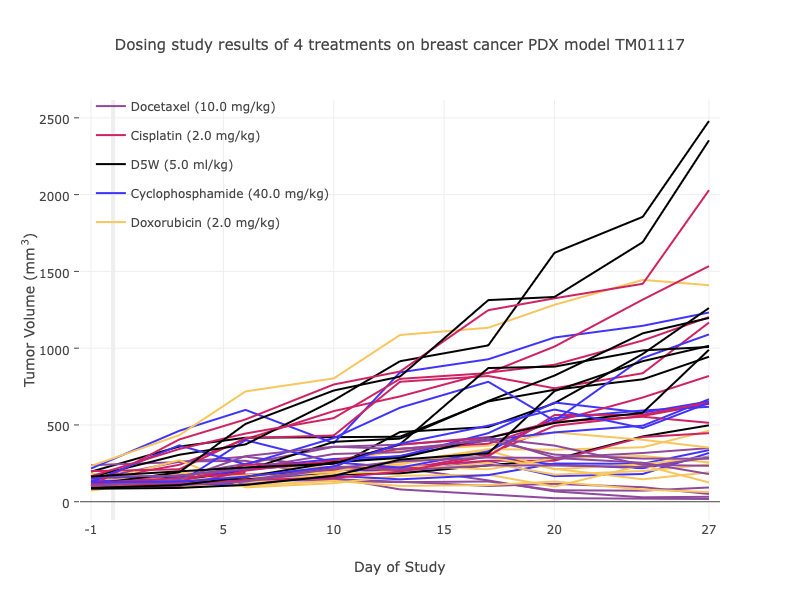

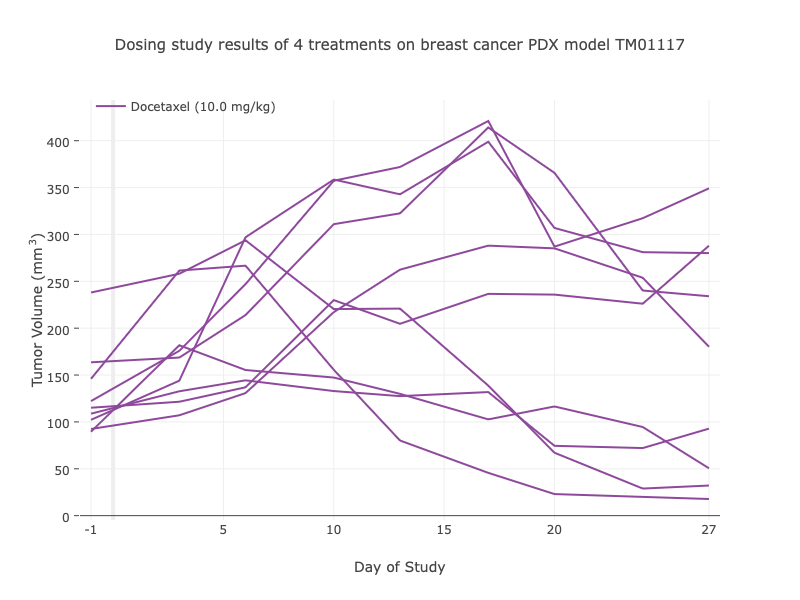

#Importar biblotecas necesarias

In [99]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Input, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Preparación de los datos

In [100]:
datos = pd.read_excel('Datos_Crecimiento_Tumores-2.xls')
datos = datos.drop([0])
datos

,Tabla 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
1,117_11,196.0,359.0,417.0,419.0,423.0,653.0,729.0,797.0,944.0,1.0
2,117_7,164.0,196.0,223.0,247.0,375.0,871.0,880.0,985.0,1008.0,1.0
3,117_42,163.0,306.0,373.0,661.0,915.0,1018.0,1621.0,1855.0,2479.0,1.0
4,117_3,118.0,128.0,148.0,222.0,454.0,487.0,642.0,962.0,1261.0,1.0
5,117_36,117.0,140.0,204.0,390.0,411.0,656.0,821.0,1097.0,1197.0,1.0
6,117_52,112.0,192.0,507.0,724.0,815.0,1313.0,1333.0,1691.0,2353.0,1.0
7,117_2,102.0,167.0,171.0,180.0,185.0,137.0,275.0,425.0,498.0,1.0
8,117_56,90.0,108.0,161.0,257.0,285.0,413.0,513.0,579.0,989.0,1.0
9,1117_6,85.0,90.0,109.0,169.0,274.0,315.0,720.0,915.0,1016.0,1.0
10,117_19,238.0,258.0,294.0,220.0,221.0,139.0,67.0,29.0,32.0,2.0


# Separar datos en características $X$ y etiquetas $y$

In [101]:
X = datos.iloc[:, 1:10]  # Selecciona columnas de la 1 a la 9 como características
y = datos.iloc[:, 10]

In [102]:
y_tf = tf.keras.utils.to_categorical(y - 1, num_classes=5)
#y_tf

#Configuración del modelo

In [103]:
modelo = Sequential()
modelo.add(Input(shape=(9,)))
modelo.add(Dense(32, activation='relu'))
modelo.add(Dense(32, activation='relu'))
modelo.add(Dense(5, activation='softmax'))
modelo.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 32)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,541 (6.02 KB)

 Trainable params: 1,541 (6.02 KB)

 Non-trainable params: 0 (0.00 B)

#Optimizado, función de perdida

In [104]:
optimizador = tf.keras.optimizers.Adam(learning_rate=0.01)  # Optimizador Adam con tasa de aprendizaje de 0.01
modelo.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])

#Entrenamiento del modelo

In [105]:
modelo.fit(X, y_tf, epochs=200)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1157 - loss: 322.3841
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2611 - loss: 159.2422 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2951 - loss: 72.8722 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3176 - loss: 70.2753 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2699 - loss: 66.6557 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3264 - loss: 51.3168 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4021 - loss: 39.3541 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4021 - loss: 31.1017 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4377 - loss: 28.6500 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3873 - loss: 19.3359 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4421 - loss: 12.9638 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy

#Evaluación de el modelo mediante matriz de confución

In [106]:
predicciones = modelo.predict(X)
#print(predicciones.shape)
#print(np.round(predicciones[0], 3))
y_pred = np.argmax(predicciones, axis=1) + 1
cm = confusion_matrix(y, y_pred)
#print(cm)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Matriz de confución

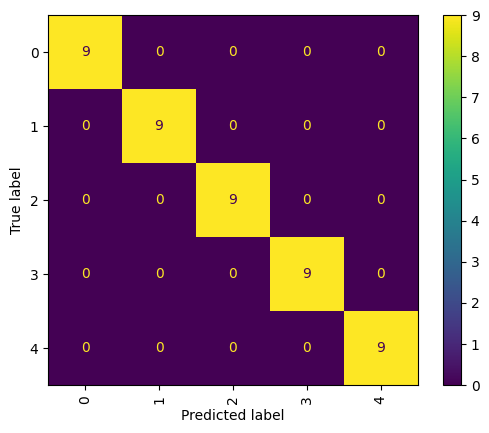

In [107]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical')  # Rotación vertical para etiquetas de eje x
plt.show()  # Mostrar la matriz de confusión gráfica